In [55]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math
import copy
%store -r random_numbers_matrix

In [64]:
def LR(x):
    return np.exp(-x/100)*0.01+0.00001

In [122]:
alpha = 0

In [86]:
n = 10000000
dim_array = [2,4,8,10,16,20,24]
Accuracy_dim_alpha4 = [0]*len(dim_array)
l = 0 

for dim in dim_array:
    # Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
    mu = np.zeros(dim) 
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    num_samples = 410 

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    True_posetiv = np.zeros(len(dim_array))
    True_negativ = np.zeros(len(dim_array))
    False_posetiv = np.zeros(len(dim_array))
    False_negativ = np.zeros(len(dim_array))
    
    Y_updated = np.delete(Y,random_numbers_matrix[0].flatten().astype(int), axis=0)

    prev_grad = 200
    grad = 0
    points_copy = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1

    connections = Y[random_numbers_matrix[0].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[l] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[l] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[l] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ[l] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))

    l += 1
    
Accuracy_dim_alpha4 = (True_posetiv+True_negativ)/(len(sigmoid_value))


200
-10590910.39529106
9716844.149118116
407477.62805118895
95962.18386667583
48315.90309286816
37615.36333787441
36704.892918343365
36699.20355766124
36873.35604108652
21261.718311772216
11765.28384734114
9145.546913256345
10805.345104459135
9123.013550630683
8768.793933617344
6343.0649972645915
4877.575168330091
3097.6360133439157
1045.4051127237617
3257.6554590256274
7473.535302587159
7267.452952411055
5227.923780654615
4527.843865333853
5508.472305197996
4399.140423292527
768.404864164906
301.42655363828817
2349.0724318018765
2400.126187711772
4003.1396141080477
4032.502266892079
4423.924675997117
3410.9554124674687
1512.3526801394073
447.1680686219661
132.1147055689653
784.2168068123137
1595.6195336114215
2296.7569072131882
2723.453415913311
1185.0219169807278
19.59928998563555
1183.703788549392
1053.7618851640636
-78.38303371013171
-251.09844448803597
303.9973730784732
926.8804425368089
779.1012219511449
390.13769985304316
773.7626007627841
715.4535954638995
543.2619376686525
615

In [88]:
Accuracy_dim_alpha4 = np.sum(Accuracy_dim_alpha4,axis=1)

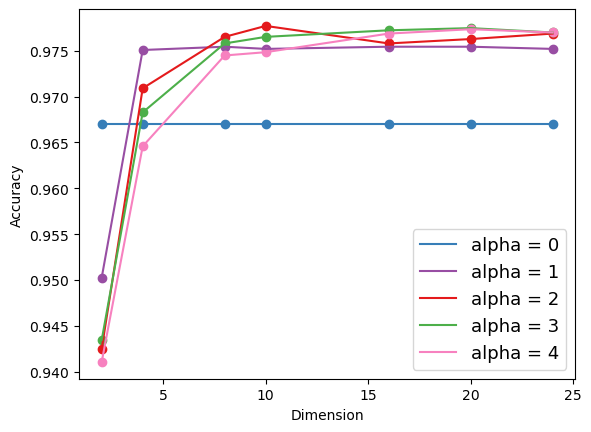

In [133]:
# Define x-axis values
plt.plot(dim_array, Accuracy_dim_alpha0, label='alpha = 0', color = '#377eb8')
plt.plot(dim_array, Accuracy_dim_alpha1, label='alpha = 1', color = '#984ea3')
plt.plot(dim_array, Accuracy_dim_alpha2, label='alpha = 2', color = '#e41a1c')
plt.plot(dim_array, Accuracy_dim_alpha3, label='alpha = 3', color = '#4daf4a')
plt.plot(dim_array, Accuracy_dim_alpha4, label='alpha = 4', color = '#f781bf')
plt.scatter(dim_array, Accuracy_dim_alpha0, facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(dim_array, Accuracy_dim_alpha1, facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(dim_array, Accuracy_dim_alpha2, facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(dim_array, Accuracy_dim_alpha3, facecolors='#4daf4a', edgecolors='#4daf4a')
plt.scatter(dim_array, Accuracy_dim_alpha4, facecolors='#f781bf', edgecolors='#f781bf')
plt.ylabel('Accuracy')
plt.xlabel('Dimension')
plt.legend(fontsize=13)
plt.show()